In [3]:
from DQN import DQN_Agent
from QR_DQN import QR_DQN_Agent
from IQN import IQN_Agent
from NAF import NAF_Agent
from TD3 import TD3_Agent
from PPO import PPO_Agent
from SAC import SAC_Agent

import optuna
from optuna import create_study
from optuna.samplers import TPESampler
from optuna.pruners import PatientPruner, MedianPruner

import json
import torch

# DEFINITION OF THE TRIAL OBJECT

Below there are defined all the optimizer object for each agent. Choose the one you prefer.

In [5]:
def DQN_optim(trial):
      # Define the space of hyperparameters to run the search for optimization
      int_batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
      int_gamma = trial.suggest_float("gamma", 0.90, 0.99)
      int_eps_start = trial.suggest_float("eps_start", 0.95, 0.99)
      int_eps_decay = trial.suggest_categorical("eps_decay", [500, 750, 1000, 1250])
      int_eps_end = trial.suggest_float("eps_end", 0.025, 0.1)
      int_tau = trial.suggest_float("tau", 0.0025, 0.0075)
      int_lr = trial.suggest_float("lr", 1e-5, 1e-3)

      # init the agent
      model = DQN_Agent(ENV_NAME="LunarLander-v2",
            BATCH_SIZE=int(int_batch_size),
            GAMMA=int_gamma,
            EPS_START=int_eps_start,
            EPS_DECAY=int(int_eps_decay),
            EPS_END=int_eps_end,
            TAU=int_tau,
            LR=int_lr,
            N_EPISODES=400,
            PRINT_PLOT=True)
      # run the training
      model.training()
      # return the loss to choose the hyper parameters
      return  float(model.return_metric(4))


In [ ]:
def TD3_optim(trial):
      # Define the space of hyperparameters to run the search for optimization
      int_batch_size = trial.suggest_categorical("batch_size", [64, 128, 256, 512])
      int_gamma = trial.suggest_float("gamma", 0.90, 0.99)
      int_sd_noise = trial.suggest_float("sd_noise", 0.3, 1)
      int_sd_noise_decay = trial.suggest_float("sd_noise_decay", 0.1, 0.99)
      int_steps_decay_sd = trial.suggest_categorical("steps_decay_sd", [5, 10, 15, 20])
      int_cp_value = trial.suggest_float("cp_value", 0.01, 0.2)
      int_steps_update_policy = trial.suggest_categorical("steps_update_policy", [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
      int_tau = trial.suggest_float("tau", 0.0025, 0.0075)
      int_lr = trial.suggest_float("lr", 1e-5, 1e-3)
      int_repetition = trial.suggest_categorical("repetition", [2, 4, 6, 8 ,10])

      # init the agent
      model = TD3_Agent(ENV_NAME="CarRacing-v3",
            BATCH_SIZE=int(int_batch_size),
            GAMMA=int_gamma,
            SD_NOISE=int_sd_noise,
            SD_DECAY=int(int_sd_noise_decay),
            STEPS_DECAY_SD=int_steps_decay_sd,
            CP_VALUE=int_cp_value,
            STEP_UPT_POLICY=int(int_steps_update_policy),
            TAU=int_tau,
            LR=int_lr,
            REPETITION=int(int_repetition),
            N_EPISODES=400,
            PRINT_PLOT=False)
      # run the training
      model.training()
      # return the loss to choose the hyper parameters
      return  float(model.return_metric(4))


In [ ]:
def NAF_optim(trial):
      # Define the space of hyperparameters to run the search for optimization
      int_batch_size = trial.suggest_categorical("batch_size", [64, 128, 256, 512])
      int_gamma = trial.suggest_float("gamma", 0.90, 0.99)
      int_eps = trial.suggest_float("eps", 0.5, 1)
      int_eps_decay = trial.suggest_float("eps_decay", 0.025, 0.1)
      int_steps_decay = trial.suggest_categorical("steps_decay", [5, 10, 15, 20, 40, 60])
      int_tau = trial.suggest_float("tau", 0.0025, 0.0075)
      int_lr = trial.suggest_float("lr", 1e-5, 1e-3)
      int_repetition = trial.suggest_categorical("repetition", [2, 4, 6, 8, 10])

      # init the agent
      model = NAF_Agent(ENV_NAME="CarRacing-v3",
            BATCH_SIZE=int(int_batch_size),
            GAMMA=int_gamma,
            EPSILON = int_eps,
            EPSILON_DECAY=int_eps_decay,
            STEPS_DECAY=int_steps_decay,
            TAU=int_tau,
            LR=int_lr,
            REPETITION=int(int_repetition),
            N_EPISODES=200,
            PRINT_PLOT=False)
      # run the training
      model.training()
      # return the loss to choose the hyper parameters
      return  float(model.return_metric(4))

In [ ]:
def QR_DQN_optim(trial):
      # Define the space of hyperparameters to run the search for optimization
      int_batch_size = trial.suggest_categorical("batch_size", [64, 128, 256, 512])
      int_gamma = trial.suggest_float("gamma", 0.90, 0.99)
      int_eps_start = trial.suggest_float("eps_start", 0.95, 0.99)
      int_eps_decay = trial.suggest_categorical("eps_decay", [500, 750, 1000, 1250])
      int_eps_end = trial.suggest_float("eps_end", 0.025, 0.1)
      int_tau = trial.suggest_float("tau", 0.0025, 0.0075)
      int_lr = trial.suggest_float("lr", 1e-5, 1e-3)
      int_n_quantiles = trial.suggest_int("n_quantiles", 20, 70)

      # init the agent
      model = DQN_Agent(ENV_NAME="LunarLander-v2",
            BATCH_SIZE=int(int_batch_size),
            GAMMA=int_gamma,
            EPS_START=int_eps_start,
            EPS_DECAY=int(int_eps_decay),
            EPS_END=int_eps_end,
            TAU=int_tau,
            LR=int_lr,
            N_QUANTILES=int_n_quantiles
            N_EPISODES=400,
            PRINT_PLOT=False)
      # run the training
      model.training()
      # return the loss to choose the hyper parameters
      return  float(model.return_metric(4))

In [ ]:
def SAC_optim(trial):
      # Define the space of hyperparameters to run the search for optimization
      int_batch_size = trial.suggest_categorical("batch_size", [64, 128, 256, 512])
      int_gamma = trial.suggest_float("gamma", 0.90, 0.99)
      int_entropy_param = trial.suggest_float("entropy", 0.05, 0.2)
      int_epochs = trial.suggest_int("epochs", 4, 30)
      int_steps_update = trial.suggest_categorical("steps_update", [10, 20, 30])
      int_tau = trial.suggest_float("tau", 0.0025, 0.0075)
      int_lr = trial.suggest_float("lr", 1e-5, 1e-3)
      int_repetition = trial.suggest_categorical("repetition", [2, 4, 6, 8 ,10])

      # init the agent
      model = SAC_Agent(ENV_NAME="CarRacing-v3",
            BATCH_SIZE=int(int_batch_size),
            GAMMA=int_gamma,
            ENTROPY_PARAM=int_entropy_param,
            K_EPOCHS=int_epochs,
            STEPS_UPDATE=int_steps_update,
            TAU=int_tau,
            LR=int_lr,
            REPETITION=int(int_repetition),
            N_EPISODES=400,
            PRINT_PLOT=False)
      # run the training
      model.training()
      # return the loss to choose the hyper parameters
      return  float(model.return_metric(4))


In [ ]:
def IQN_optim(trial):
      # Define the space of hyperparameters to run the search for optimization
      int_batch_size = trial.suggest_categorical("batch_size", [64, 128, 256, 512])
      int_gamma = trial.suggest_float("gamma", 0.90, 0.99)
      int_eps_start = trial.suggest_float("eps_start", 0.95, 0.99)
      int_eps_decay = trial.suggest_categorical("eps_decay", [500, 750, 1000, 1250])
      int_eps_end = trial.suggest_float("eps_end", 0.025, 0.1)
      int_tau = trial.suggest_float("tau", 0.0025, 0.0075)
      int_lr = trial.suggest_float("lr", 1e-5, 1e-3)
      int_sub_agents = trial.suggest_int("sub_agents", 2, 10)

      # init the agent
      model = IQN_Agent(ENV_NAME="LunarLander-v2",
            BATCH_SIZE=int(int_batch_size),
            GAMMA=int_gamma,
            EPS_START=int_eps_start,
            EPS_DECAY=int(int_eps_decay),
            EPS_END=int_eps_end,
            TAU=int_tau,
            LR=int_lr,
            SUB_AGENTS=int_sub_agents
            N_EPISODES=400,
            PRINT_PLOT=False)
      # run the training
      model.training()
      # return the loss to choose the hyper parameters
      return  float(model.return_metric(4))

In [ ]:
def PPO_optim(trial):
      # Define the space of hyperparameters to run the search for optimization
      int_batch_size = trial.suggest_categorical("batch_size", [64, 128, 256, 512])
      int_num_batch_max = trial.suggest_int("max_n_batch", 2, 10)
      int_gamma = trial.suggest_float("gamma", 0.90, 0.99)
      int_trunc_param = trial.suggest_int("trunc_param", 2, 6)
      int_lambda = trial.suggest_float("lambda", 0.01, 0.99)
      int_max_len_traj = int.suggest_int("len_max_traj", 500, 2000)
      int_n_actors = trial.suggest_int("n_actors", 2, 6)
      int_epochs = trial.suggest_int("epochs", 4, 30)
      int_clip_value = trial.suggest_float("clip_value", 0.01, 0.3)
      int_entropy = trial.suggest_float("entropy_coef", 0.1, 0.6)
      int_lr = trial.suggest_float("lr", 1e-5, 1e-3)
      int_repetition = trial.suggest_categorical("repetition", [2, 4, 6, 8 ,10])

      # init the agent
      model = PPO_Agent(ENV_NAME="CarRacing-v3",
            BATCH_SIZE=int(int_batch_size),
            NUM_BATCH_MAX=int_num_batch_max,
            GAMMA=int_gamma,
            TRUNC_PARAM=int_trunc_param,
            LAMBDA=int_lambda,
            MAX_LEN_TRAJ=int_max_len_traj,
            N_ACTORS=int_n_actors,
            K_EPOCHS=int_epochs,
            CLIP_VALUE=int_clip_value,
            COEF_H=int_entropy,
            LR=int_lr,
            REPETITION=int(int_repetition),
            N_EPISODES=400,
            PRINT_PLOT=False)
      # run the training
      model.training()
      # return the loss to choose the hyper parameters
      return  float(model.return_metric(4))


# INITIALIZATION OF THE HYPERPARAMETER OPTIMIZER AND RUN

Here, replace DQN_optim with the model you selected above (so replace it with the correct optim).

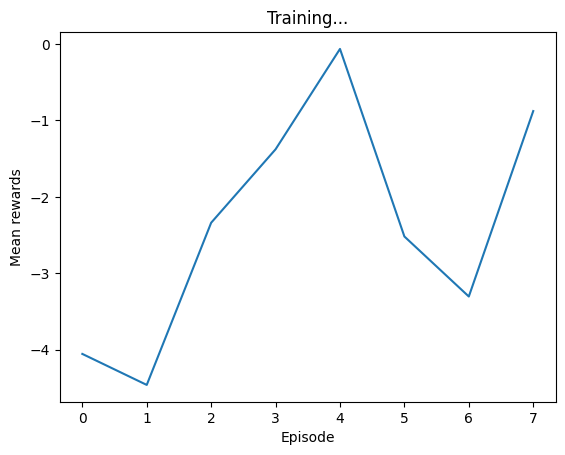

<Figure size 640x480 with 0 Axes>

In [ ]:
study = create_study(direction="maximize", sampler=TPESampler(), pruner=PatientPruner(MedianPruner(), patience=3))
study.optimize(DQN_optim, n_trials=60, n_jobs=1)

GET HYPERPARAMETERS AND RE-TRAIN

In [ ]:
best_param = study.best_trial.params

In [ ]:
model = DQN_Agent(ENV_NAME="LunarLander-v2",
                  BATCH_SIZE=best_param["batch_size"],
                  GAMMA=best_param["gamma"],
                  EPS_START=best_param["eps_start"],
                  EPS_DECAY=best_param["eps_decay"],
                  EPS_END=best_param["eps_end"],
                  TAU=best_param["tau"],
                  LR=best_param["lr"],
                  N_EPISODES=400,
                  PRINT_PLOT=True)

In [ ]:
model = TD3_Agent(ENV_NAME="CarRacing-v3",
                  BATCH_SIZE=best_param["batch_size"],
                  GAMMA=best_param["gamma"],
                  SD_NOISE=best_param["sd_noise"],
                  SD_DECAY=best_param["sd_noise_decay"],
                  STEPS_DECAY_SD=best_param["steps_decay_sd"],
                  CP_VALUE=best_param["cp_value"],
                  STEP_UPT_POLICY=best_param["steps_update_policy"],
                  TAU=best_param["tau"],
                  LR=best_param["lr"],
                  REPETITION=best_param["repetition"],
                  N_EPISODES=400,
                  PRINT_PLOT=True)

In [ ]:
model = NAF_Agent(ENV_NAME="CarRacing-v3",
                  BATCH_SIZE=best_param["batch_size"],
                  GAMMA=best_param["gamma"],
                  EPSILON = best_param["eps"],
                  EPSILON_DECAY=best_param["eps_decay"],
                  STEPS_DECAY=best_param["steps_decay"],
                  TAU=best_param["tau"],
                  LR=best_param["lr"],
                  REPETITION=best_param["repetition"],
                  N_EPISODES=200,
                  PRINT_PLOT=False)

In [ ]:
model = QR_DQN_Agent(ENV_NAME="LunarLander-v2",
                     BATCH_SIZE=best_param["batch_size"],
                     GAMMA=best_param["gamma"],
                     EPS_START=best_param["eps_start"],
                     EPS_DECAY=best_param["eps_decay"],
                     EPS_END=best_param["eps_end"],
                     TAU=best_param["tau"],
                     LR=best_param["lr"],
                     N_QUANTILES=best_param["n_quantiles"],
                     N_EPISODES=400,
                     PRINT_PLOT=True)

In [ ]:
model = SAC_Agent(ENV_NAME="CarRacing-v3",
                  BATCH_SIZE=best_param["batch_size"],
                  GAMMA=best_param["gamma"],
                  ENTROPY_PARAM=best_param["entropy"],
                  K_EPOCHS=best_param["epochs"],
                  STEPS_UPDATE=best_param["steps_update"],
                  TAU=best_param["tau"],
                  LR=best_param["lr"],
                  REPETITION=best_param["repetition"],
                  N_EPISODES=400,
                  PRINT_PLOT=False)

In [ ]:
model = IQN_Agent(ENV_NAME="LunarLander-v2",
                     BATCH_SIZE=best_param["batch_size"],
                     GAMMA=best_param["gamma"],
                     EPS_START=best_param["eps_start"],
                     EPS_DECAY=best_param["eps_decay"],
                     EPS_END=best_param["eps_end"],
                     TAU=best_param["tau"],
                     LR=best_param["lr"],
                     SUB_AGENTS=best_param["sub_agents"],
                     N_EPISODES=400,
                     PRINT_PLOT=True)

In [ ]:
model = PPO_Agent(ENV_NAME="CarRacing-v3",            
                 BATCH_SIZE=best_param["batch_size"],
                 NUM_BATCH_MAX=best_param["max_n_batch"],
                 GAMMA=best_param["gamma"],
                 TRUNC_PARAM=best_param["trunc_param"],
                 LAMBDA=best_param["lambda"],
                 MAX_LEN_TRAJ=best_param["len_max_traj"],
                 N_ACTORS=best_param["n_actors"],
                 K_EPOCHS=best_param["epochs"],
                 CLIP_VALUE=best_param["clip_value"],
                 COEF_H=best_param["entropy_coef"],
                 LR=best_param["lr"],
                 REPETITION=best_param["repetition"],
                 N_EPISODES=400,
                 PRINT_PLOT=False)

In [60]:
model.training()

<Figure size 640x480 with 0 Axes>

SAVE BEST COMBINATION

In [78]:
FILE_PATH1 = "best_hyperparameters.json"
FILE_PATH2 = "best_parameters.pt"

with open(FILE_PATH1, 'w') as json_file:
    json.dump(best_param, json_file, indent=4)

torch.save(model.return_weights(), FILE_PATH2)
